# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: \Torero, William Klien B.
_Student No._:\ 2022-10739
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** William Klien B. Torero

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


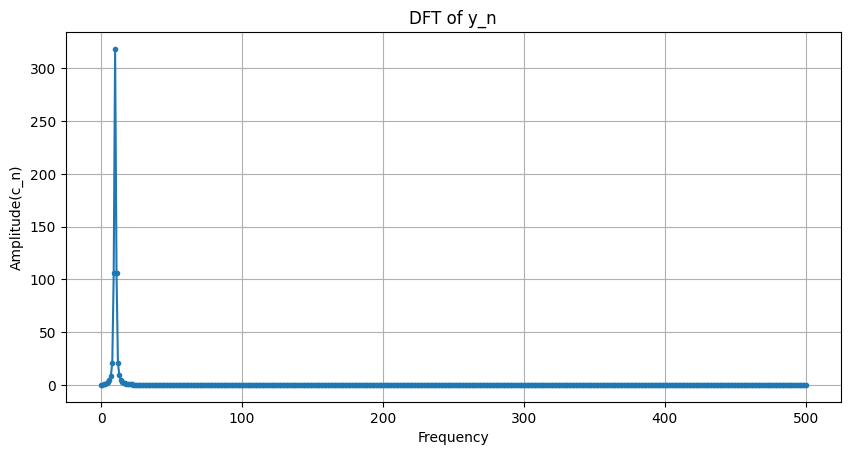

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Computing the function that will solve for the discrete fourier transoform coefficient
def dft(y):
    N = len(y) # Setting the length for the input signal
    c = np.zeros(N//2+1, dtype=complex) # Setting c as an array of zeros and making it complex for the dft coefficients
                                        # Specifying the only half the value of N+1 is needed to calculate for c, since the given sample size will be even
    for k in range(N//2+1): # Make an iteration for over half the number of given sample size for each frequency
        for n in range(N): # For every value of frequency k, use the time samples n to calculate the coefficient in dft
            c[k] += y[n] * np.exp(-2j * np.pi * k * n / N) # Use the given formula of dft to finally solve for the kth coefficient
    return c

N = 1000 # Define the given sample size

n = np.arange(N) # Setting n as an array containing the given sample size

y_n = np.sin(np.pi * n / N) * np.sin(20 * np.pi * n / N) # Defining the modulated sine wave that will be used to calculate the coefficient

c_n = dft(y_n) # Calculate now the magnitude of dft coefficient using the defined modulated sine wave which will serve as the amplitude

frequencies = np.arange(len(c_n)) # Setting the frequency as the length of the dft coefficient

# Plot the amplitude vs frequency
plt.figure().set_figwidth(10) # Width of the plot
plt.plot(frequencies, np.abs(c_n), marker='.', linestyle='-') # Plot the magnitude of the dft coefficients, amplitude, vs the frequency
plt.title('DFT of y_n')
plt.xlabel('Frequency')
plt.ylabel('Amplitude(c_n)')
plt.grid(True)
plt.show()

The graph illustrates how different frequencies contribute to the overall shape or behavior of the time domain signal. It can be observed that the there is a peak in a specifically at low frequency. This peak indicates the strong presence of frequency in the original signal This is because of the modulated sine wave that initiates a slow varying component. The signal of the product of sine waves indicates that it has a frequency that are relatively close to each other. From this, we can conclude that energy signal is focused more on lower frequencies

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [57]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [58]:
!ls drive/My\ Drive/Colab\ Notebooks

'AppPhys155 Modules'   dow.txt	 lab_assignment_module3.ipynb  'Tensor Python Practice'


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [63]:
file_path = "/content/drive/My Drive/Colab Notebooks/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [64]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

print(dow[0:10])

[12121.71 12136.44 12226.73 12221.93 12194.13 12283.85 12331.6  12309.25
 12278.41 12307.48]


Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

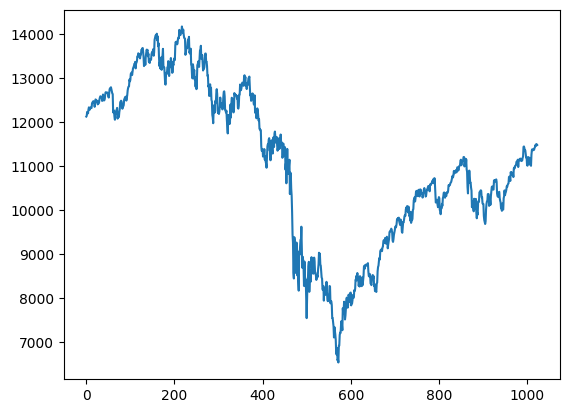

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data set
plt.plot(dow)
plt.show()

513
1024


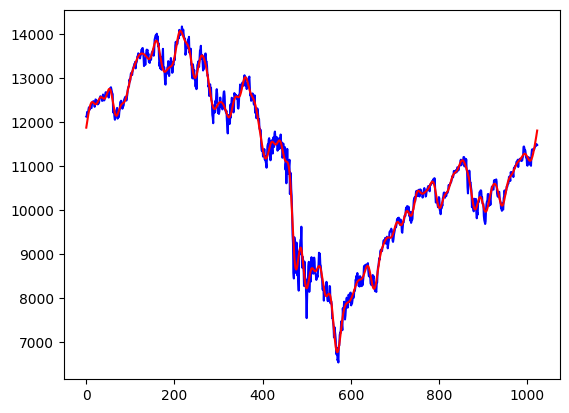

In [88]:
import numpy as np
from numpy.fft import rfft, irfft

# Calculating the coefficient for dft using numpy's package for fast fourier transform
ck = rfft(dow)
print(len(ck)) # The original data dow will be reduce to half the frequency
# After the process of rfft, the number of data is reduced to half
ck0 = ck[0:round(0.1*len(ck))] # This keeps the first 10% of the reduced data set
ck1 = ck[51:513]*0 # Setting the 90% of the data to be zero
ck2 = np.concatenate((ck0, ck1)) # Combining the two generated array of values

# Calculating the inverse foureir transform using numpy's package
inv_ck2 = irfft(ck2)
print(len(inv_ck2)) # The reduced frequency will now be back to its original length

# Plotting the desired data
plt.plot(dow, color='blue')
plt.plot(inv_ck2, color='red')
plt.show()


The blue graph represents the original signal from the original dow data. While the red graph represents the new signal acquired from making only the first 10% of the original dow data be non zero. It can be observed that both lines follows the same trend. Their difference is that the red line appears to be much more smoother than the blue one. This is because 90% of the frequencies was removed leaving only the low frequencies. We know that with greater amount of frequencies, rapid oscillations may occur in the time domain signal. This is opposite when the amount of frequency is much smaller makingt the time domain signal much more smoother.